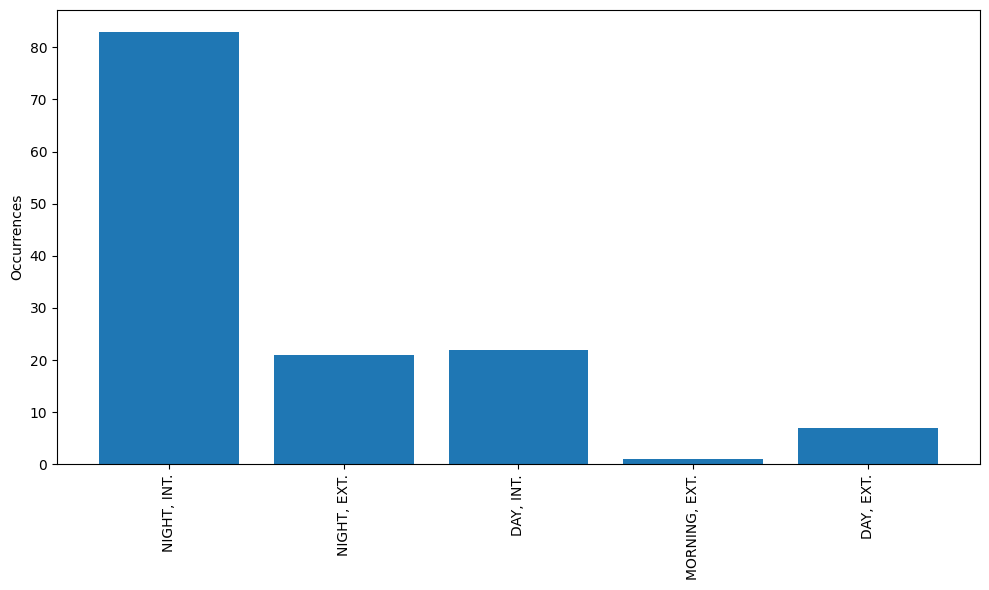

In [55]:
from xml.etree import ElementTree as ET
import networkx as nx
import matplotlib.pyplot as plt
import csv

def generate_coordinates_dictionary(xml_file_path):
    tree = ET.parse(xml_file_path)
    root = tree.getroot()

    coordinates_list = []
    coordinates_dict= {}
    time_stage_elements = root.findall(".//{http://www.tei-c.org/ns/1.0}stage[@type='time']")
    env_stage_elements = root.findall(".//{http://www.tei-c.org/ns/1.0}stage[@type='environment']")

    for time_stage, env in zip(time_stage_elements, env_stage_elements):
        time_content = time_stage.text.strip() if time_stage.text else ""
        env_content = env.text.strip() if env.text else ""
        coordinates_list.append((time_content, env_content))
    
    for i in coordinates_list:
        if i in coordinates_dict:
            coordinates_dict[i] +=1
        else:
            coordinates_dict[i] = 1


    tuples = list(coordinates_dict.keys())
    counts = list(coordinates_dict.values())

    x_labels = [f"{t[0]}, {t[1]}" for t in tuples]

    plt.figure(figsize=(10, 6))
    plt.bar(x_labels, counts)
    plt.xticks(rotation=90)
    plt.ylabel('Occurrences')
    plt.tight_layout()
    plt.show()


generate_coordinates_dictionary('C:/Users/crosi/Documents/GitHub/metascript/eyes-wide-shut-1999-transcription.xml')